# **Jambogree Education - Introduction**

* **Jamboree** has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
* They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## **Problem statement**

* To find which features are important to figure out the chances of admimission.
* Also, how each and every variable are related to each other.

## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression #Fit linear regression model
import statsmodels.api as sm #Statistical summary of the model

## **Exploratory Data Analysis**

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [11]:
df["Serial No."].nunique()  #The given data is for 500 separate individuals

500

In [12]:
Research = df["Research"].value_counts()
Research

1    280
0    220
Name: Research, dtype: int64

In [13]:
df["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [14]:
df["CGPA"].value_counts()

8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: CGPA, Length: 184, dtype: int64

In [15]:
df["GRE Score"].value_counts()

312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64

In [16]:
df["TOEFL Score"].value_counts()

110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64

In [17]:
df["SOP"].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [18]:
df["LOR "].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

In [19]:
df.drop(columns=["Serial No."], inplace = True)

In [20]:
columns = df.columns
columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
# Detecting Outliers

for i in columns:
    Q1 = np.quantile(df[i], 0.25)
    Q2 = np.quantile(df[i], 0.50)
    Q3 = np.quantile(df[i], 0.75)
    IQR = Q3 - Q1
    LW = max(Q1 - 1.5 * IQR,0)
    UW = Q3 + 1.5 * IQR
    outliers = df.loc[(df[i] < LW) | (df[i] > UW)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f"Q2 : {Q2} ")
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'Lower_whisker : {LW}')
    print(f'Upper_whisker : {UW}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('---------------------------')

Column : GRE Score
Q1 : 308.0
Q2 : 317.0 
Q3 : 325.0
IQR : 17.0
Lower_whisker : 282.5
Upper_whisker : 350.5
Number of outliers : 0
---------------------------
Column : TOEFL Score
Q1 : 103.0
Q2 : 107.0 
Q3 : 112.0
IQR : 9.0
Lower_whisker : 89.5
Upper_whisker : 125.5
Number of outliers : 0
---------------------------
Column : University Rating
Q1 : 2.0
Q2 : 3.0 
Q3 : 4.0
IQR : 2.0
Lower_whisker : 0
Upper_whisker : 7.0
Number of outliers : 0
---------------------------
Column : SOP
Q1 : 2.5
Q2 : 3.5 
Q3 : 4.0
IQR : 1.5
Lower_whisker : 0.25
Upper_whisker : 6.25
Number of outliers : 0
---------------------------
Column : LOR 
Q1 : 3.0
Q2 : 3.5 
Q3 : 4.0
IQR : 1.0
Lower_whisker : 1.5
Upper_whisker : 5.5
Number of outliers : 1
---------------------------
Column : CGPA
Q1 : 8.127500000000001
Q2 : 8.56 
Q3 : 9.04
IQR : 0.9124999999999979
Lower_whisker : 6.7587500000000045
Upper_whisker : 10.408749999999996
Number of outliers : 0
---------------------------
Column : Research
Q1 : 0.0
Q2 : 1.0 


### **Univariate analysis**

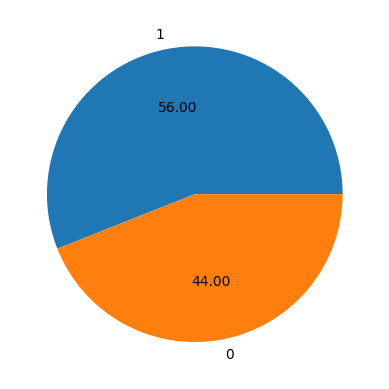

In [22]:
plt.pie(Research, labels = Research.index, autopct = "%.2f")
plt.show()

<Axes: xlabel='University Rating', ylabel='count'>

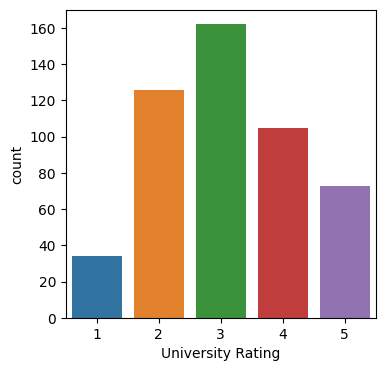

In [23]:
plt.figure(figsize = (4,4))
sns.countplot(data = df, x=df["University Rating"])

### **Bivariate analysis**

<Axes: xlabel='University Rating', ylabel='GRE Score'>

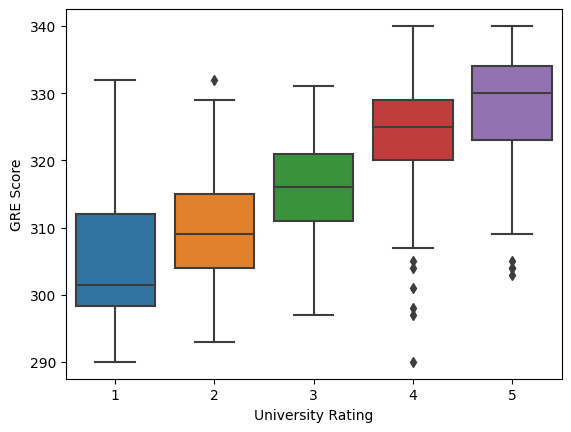

In [24]:
# University rating vs GRE score
sns.boxplot(x=df["University Rating"], y=df["GRE Score"])

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

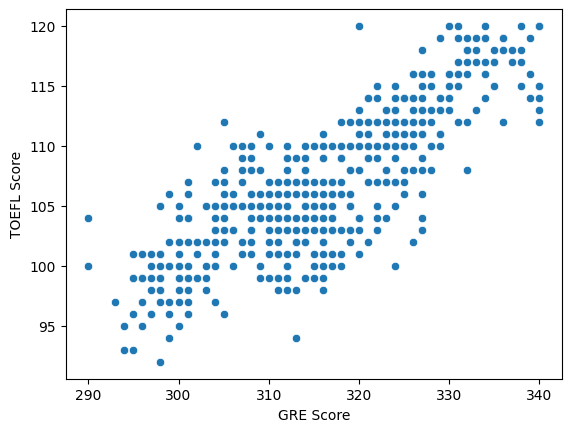

In [25]:
#GRE Score vs TOEFL score
sns.scatterplot(data=df, x=df["GRE Score"], y=df["TOEFL Score"])

<Axes: xlabel='SOP', ylabel='LOR '>

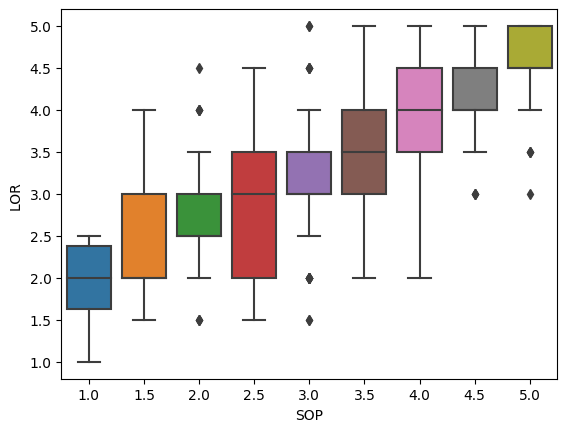

In [26]:
# SOP vs LOR
sns.boxplot(data = df, x=df["SOP"], y=df["LOR "])

<Axes: xlabel='LOR ', ylabel='Chance of Admit '>

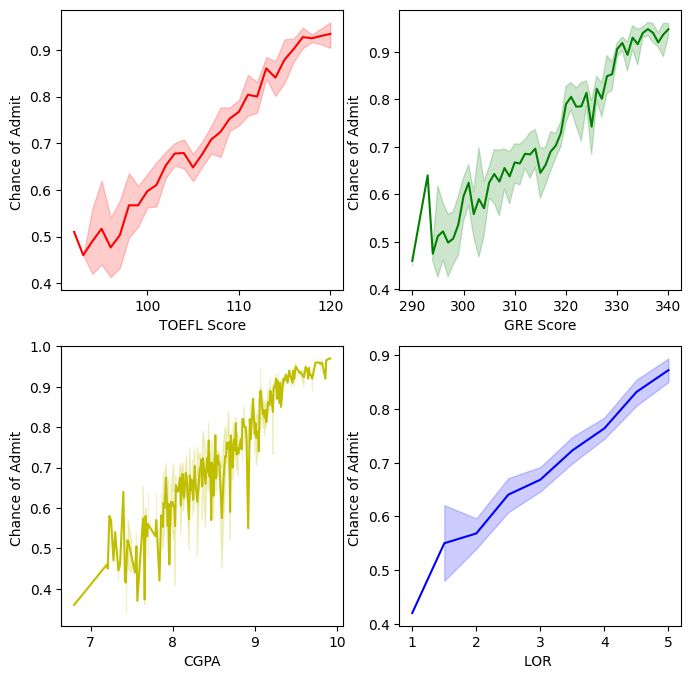

In [27]:
# GRE, TOEFL, CGPA, LOR vs Chance of admit
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.lineplot(data = df, x= df["TOEFL Score"], y = df["Chance of Admit "], color = "r")

plt.subplot(2,2,2)
sns.lineplot(data = df, x= df["GRE Score"], y = df["Chance of Admit "], color = "g")

plt.subplot(2,2,3)
sns.lineplot(data = df, x= df["CGPA"], y = df["Chance of Admit "], color = "y")

plt.subplot(2,2,4)
sns.lineplot(data = df, x= df["LOR "], y = df["Chance of Admit "], color = "b")

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

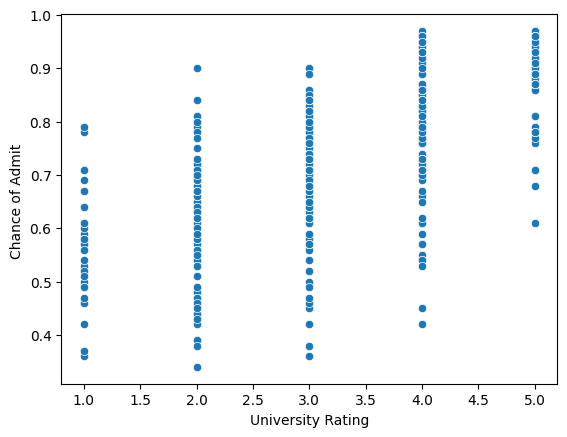

In [28]:
# University rating vs Chance of admit
sns.scatterplot(data=df, x=df["University Rating"], y= df["Chance of Admit "])

### **Multivarieate analysis**

In [29]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

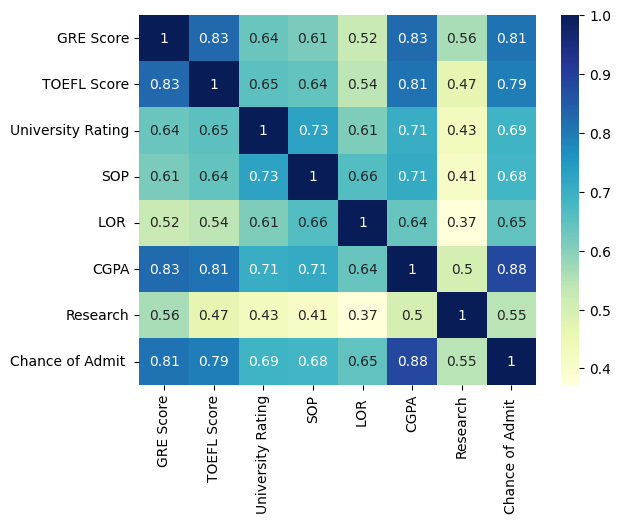

In [30]:
sns.heatmap(data= df.corr(), annot = True, cmap = "YlGnBu")

## ***Insights based on EDA***

**1. Range of attributes / Outliers of various attributes**
- Data contains 500 records, with an individually assigned serial numbers.
- There are 2 major categorical columns in the data,
  * **Reseach column** - with "0" and "1" categories, which probably means, "0" with no research experience and "1" with research experience.
  * **University rating column** - which ranges from "1 to 5"
- **GRE Scores** - One of the main examinations conducted to study abroad, where the scores are **calculated out of 340**. And here the scores ranges from 290 to 340.
- **TOEFL Scores** are other major examinations conducted for studies abroad and the scores are **calculated out of 120**. Here the values ranges from 90 to 120.
- **CGPA** - undergraduate GPA is calculated out of 10 and here it ranges from 6.8 to 9.92
- **Statement of Purpose(SOP)** - Calculated out of 5, ranges from 1.00 to 5.00
- **Letter of Recommendation(LOR)** - Calculated out of 5, ranges from 1.00 to 5.00.
- And the final column is the **dependent column** of the given data which is, **"Chance of Admit"**, it ranges from 0 to 1.**(min - 0.34, max - 0.97)**

- **Outliers** - Not many outliers are as per the detection, LOR column has 1 outlier and Chance of Admit column has 2 outliers. Since the impact caused by these outliers won't be so large, those can be considered negligible.

**2. Distribution of variables and relation between them/Comments of Univariate and bi-variate plots**
- The given data has **56% of data with research experience** and the rest **44% without any research experience** as per the pie-chart.
- Almost **160 pupil have got 3 in University ranking** which is the highest followed by 2 in ranking by 126 members. Least is 1 with 34 members. Has also shown the visual distribution in the count plot.
- 9 members have CGPA of 8.76 and 8.00 each, highest CGPA of 9.92 was scored only by 1 member and totally 184 unique values of CGPA are present in the given data.
- 24 members scored 312/340 in GRE - Highest in count. 340/340 was scored by 9 members.
- 44 members scored 110/120 in TOEFL - highest in count. 120/120 was again scored by members.
- 89 members scored 4.0/5.0 in SOP - highest in count. 5.0/5.0 was scored by 42 members.
- 99 members got 3.0/5.0 in LOR - highest in count. 5.0/5.0 was scored by 50 members(ie) almost 10% of the given data.
- A Bivariate analysis(BOX PLOT) was conducted between "university ranking" and "GRE scores" and it was observed that, **members with high university ranking, also scored the highest GRE scores** but there are a few outliers too as per the box plot representation.
- Another scatterplot was created between "GRE Score" and "TOEFL Score" to find the correlation between them and it again seems that **people with high GRE scores also have high TOEFL scores and vice-versa**.
- A box plot was created between the columns "SOP" and "LOR" and it was again observed that members with high SOP values also have high LOR values and vice-versa, with a few outliers here and there.
- Multiple line-subplots were created between features **"GRE scores, TOEFL scores, CGPA, LOR"** against the only **dependent varaible "Chance of Admit"**. And it was unianimously observed that higher the values in each feature given the more the chances of admission.
- As per the correlated datas observed in the heat map, it is seen that the**Maximum correlation is found between "CGPA" and "Chance of admit" with 0.88**.
Followed by "TOEFL and GRE" with 0.83 and "CGPA and TOEFL" with 0.81.
"LOR and Research" seems to be the least correlated one.



**Scaling the data using min max scaler to study about Linear Regression**

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(df[["GRE Score","TOEFL Score","University Rating", "SOP", "LOR ", "CGPA","Research"]]),
                 columns= ["GRE Score","TOEFL Score","University Rating", "SOP", "LOR ", "CGPA", "Research"])
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [32]:
 y = df["Chance of Admit "]

## ***Linear Regression***

### **Dividing the data into 80% train data and 20% test data**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 10)

In [34]:
y_train = np.array(y_train)

In [35]:
X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     265.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          2.29e-144
Time:                        15:11:15   Log-Likelihood:                 559.41
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3492      0.01

The StatsModel gives us  the R squared and adjusted R squared values directly.

R-squared:                       0.826

Adj. R-squared:                  0.822

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr.coef_

array([0.11916617, 0.05096051, 0.02048888, 0.02403989, 0.06016146,
       0.36387277, 0.02192849])

In [39]:
lr.intercept_

0.3492422158362933

In [40]:
y_pred1 = lr.predict(X_test)
y_pred1

array([0.90887315, 0.90353254, 0.76777555, 0.84866602, 0.71681359,
       0.75063014, 0.65146102, 0.84594493, 0.62033211, 0.74704486,
       0.90897738, 0.84971883, 0.83796653, 0.67531977, 0.78095045,
       0.74227605, 0.84460445, 0.9400255 , 0.78087845, 0.61630642,
       0.72300525, 0.6007386 , 0.62179769, 0.85342859, 0.5153151 ,
       0.92306032, 0.7225724 , 0.51364839, 0.69786384, 0.72802937,
       0.94819797, 0.7856675 , 0.56707416, 0.66894262, 0.73120658,
       0.87754074, 0.80302972, 0.66702669, 0.66400306, 0.73041275,
       0.89702577, 0.62627618, 0.69266355, 0.90856935, 0.95594144,
       0.55197572, 0.61300553, 0.78429828, 0.78922044, 0.70535376,
       0.77706303, 0.72028353, 0.58446848, 0.5966544 , 0.7107529 ,
       0.77376838, 0.85532117, 0.59907393, 0.77011348, 0.91815242,
       0.66178282, 0.89338291, 0.73409687, 0.53033998, 0.81122992,
       0.5392329 , 0.72299929, 0.69742921, 0.52164879, 0.78210376,
       0.90950258, 0.56324149, 0.60792205, 0.74584953, 0.70665

In [41]:
y_pred2 = lr.predict(X_train)
y_pred2

array([0.7721161 , 0.92432841, 0.69650938, 0.74818464, 0.89475943,
       0.52198513, 0.78677509, 0.47048339, 0.7811877 , 0.82146918,
       0.46643843, 0.73220172, 0.67783668, 0.63113511, 0.82770286,
       0.6518232 , 0.76882534, 0.53147998, 0.77800096, 0.74408624,
       0.67428263, 0.91651027, 0.80401806, 0.80936392, 0.81872059,
       0.65392806, 0.70713104, 0.75768052, 0.73640606, 0.95449851,
       0.88843435, 0.74190303, 0.8186022 , 0.79266882, 0.63588278,
       0.58007465, 0.720209  , 0.66723199, 0.82608201, 0.84029308,
       0.50974575, 0.54571948, 0.52840194, 0.78872016, 0.68202743,
       0.85241475, 0.84515484, 0.96436665, 0.90162934, 0.60631504,
       0.93542095, 0.5124357 , 0.66720243, 0.62349965, 0.86520035,
       0.69203487, 0.94095845, 0.637924  , 0.77202085, 0.85747952,
       0.81876166, 0.55883063, 0.97100537, 0.7697913 , 0.71951685,
       0.72608577, 0.81115839, 0.72314574, 0.51348328, 0.76690932,
       0.74869336, 0.70687044, 0.70538368, 0.52851556, 0.67263

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test, lr.predict(X_test))

0.797091259637587

In [44]:
r2_score(y_train, lr.predict(X_train))

0.8255906992873271

## ***Assumptions of Linear regression***

### **VIF to Detect Multicollinearity**

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
X_sm

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
305,1.0,0.62,0.607143,0.50,0.625,0.625,0.641026,1.0
107,1.0,0.96,0.892857,0.75,0.625,0.875,0.852564,1.0
350,1.0,0.56,0.535714,0.50,0.500,0.625,0.471154,1.0
334,1.0,0.44,0.535714,0.75,0.875,0.750,0.592949,1.0
142,1.0,0.82,0.821429,1.00,0.750,0.625,0.846154,1.0
...,...,...,...,...,...,...,...,...
320,1.0,0.54,0.500000,0.50,0.750,0.625,0.544872,1.0
15,1.0,0.48,0.464286,0.50,0.625,0.375,0.480769,0.0
484,1.0,0.54,0.500000,0.50,0.625,0.500,0.349359,1.0
125,1.0,0.20,0.285714,0.50,0.250,0.500,0.596154,1.0


In [47]:
vif = pd.DataFrame()
vif['features'] =X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,10.93
6,CGPA,4.86
1,GRE Score,4.46
2,TOEFL Score,4.02
4,SOP,2.85
3,University Rating,2.53
5,LOR,2.00
7,Research,1.51


The VIF values of the given data are less than 5 which symbolizes **LOW MULTICOLLINEARITY**. Except constant, which is a self created feature.
- This also signifies that in this case we don't need to drop any features.

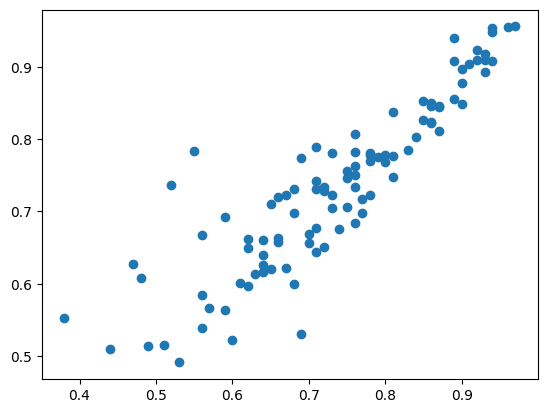

In [48]:
plt.scatter(y_test, y_pred1)

### **Normality of residuals**

In [49]:
y_hat = results.predict(X_sm)

In [50]:
errors = y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

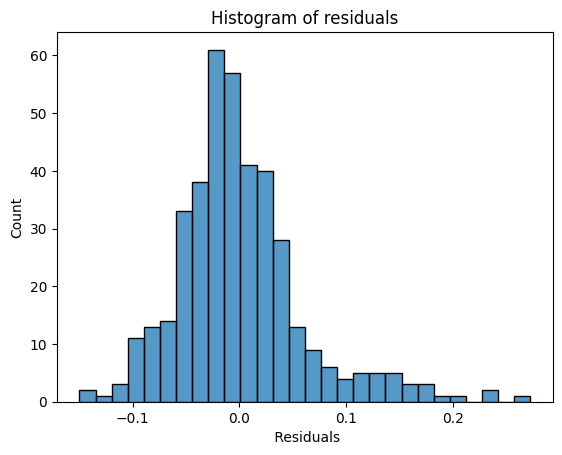

In [51]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [71]:
from scipy import stats
result = stats.shapiro(errors)
result.statistic

0.9310517311096191

- Since the value is closer to 1, it means the distribution is normal

### **Test for Homoscedasticity**

Text(0.5, 1.0, 'Predicted values vs Residuals')

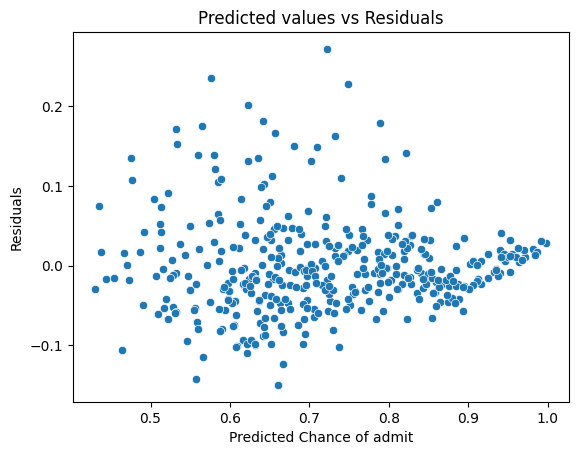

In [52]:
sns.scatterplot(x=y_pred2,y=errors)
plt.xlabel("Predicted Chance of admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- Null Hypothesis: Heteroscedasticity is not present.
- Alternate Hypothesis: Heteroscedasticity is present.

In [53]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name= ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 1.042028868565688), ('p-value', 0.38787934387938844)]

 - Since p-value > alpha(0.05) - Homoscedaticity is present

### **Auto-correlation**

- There is no auto-correlation since all the features are independent of each other except the target column.

## **Insights on Assumptions of Linear regression model**

  - Linear function EXISTS.
  - No multicollinearity has been observed as per the VIF score. Since none of the major features have VIF score of more than 5.
  - Errors are normally distributed as per the histogram of residuals.
  - No heteroscedasticity has been observed as per the Goldfeld-Quandt test conducted.
  - No auto correlation has been observed since all the datas are independent of each other and they all have a linear relationship with the "dependent variable - Chance of admit".

## **Types of regularisation : Ridge(L2) and Lasso(L1)**

In [54]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [55]:
# Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 12)

In [56]:
# Transform the features into polynomial features
degree = 3
scaler = StandardScaler()
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [57]:
polyreg_scaled.steps[-1][1].coef_

array([-7.34965479e-13,  3.72170136e-03,  1.13181491e-01, -4.51111321e-02,
        1.14062304e-01,  1.93997756e-02,  6.08625089e-02, -2.05289722e-02,
       -3.73527829e-02, -1.45887900e-01, -1.43345685e-01, -3.20135979e-01,
        3.91940546e-01,  6.13286376e-02,  2.03844399e-02, -2.22199880e-01,
        8.69593737e-02,  4.48571888e-01, -3.15517089e-01,  2.55308667e-03,
       -1.70599041e-02, -9.78435676e-02,  1.94813454e-01, -8.85834325e-02,
        1.11997601e-01,  7.15774623e-02, -3.10871017e-01,  1.22329798e-01,
       -3.30136415e-01,  5.55539033e-02, -1.00833446e-01,  8.78667800e-02,
        7.95122386e-03,  1.44659434e-01, -1.69408787e-02, -2.05289722e-02,
        3.00844922e-01, -3.34737550e-01,  6.79503678e-01, -3.17655196e-01,
        1.34959490e-01, -7.38301037e-01, -3.21786154e-01,  6.91059012e-01,
       -3.88632084e-01,  6.27761064e-02, -2.66569820e-01, -7.72903000e-02,
        3.39137580e-01,  4.66585138e-02, -4.87870823e-03,  2.52942418e-01,
       -8.97817413e-01, -

In [58]:
polyreg_scaled.score(X_train, y_train)

0.8697249926199825

In [59]:
polyreg_scaled.score(X_test, y_test)

0.6345960910276977

In [60]:
#  This shows that at polynomial degree of 4, "GOOD FIT" has been observed between the train and test data.
#  At higher degree, the difference between train and test scores are high.

**Ridge**

In [61]:
degree = 4
scaler = StandardScaler()
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
polyreg_scaled.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [62]:
polyreg_scaled.steps[-1][1].coef_

array([ 0.00000000e+00,  3.58896449e-02,  4.51553370e-02, -1.16778812e-02,
        2.09425519e-02,  2.78974159e-02,  6.14272384e-02, -9.11184952e-03,
       -1.47412086e-02, -2.16153322e-02,  4.98314719e-03, -8.02277544e-03,
        3.89576763e-02, -1.35147163e-02, -5.12126251e-03, -2.23957649e-02,
        1.84773617e-02,  2.28571503e-02, -1.75620984e-02,  7.52054670e-03,
        3.58287630e-03, -1.49791584e-02,  2.16549313e-02, -2.56327912e-02,
        6.94457995e-03,  1.28006726e-03, -5.18082683e-02, -3.09569956e-03,
        8.76349827e-03,  8.47405040e-03, -5.74045881e-03,  1.22115193e-03,
        3.25699530e-05,  2.12225088e-02,  8.19077518e-03, -9.11184952e-03,
       -1.29659623e-02, -2.06926043e-02, -6.73889806e-03, -2.51814845e-02,
        1.02954785e-02, -2.52014183e-02, -1.49051835e-03, -2.00560531e-02,
       -4.76202944e-03, -1.51736007e-02, -7.85580651e-03, -2.44417254e-02,
        1.34393757e-02,  2.82831722e-03, -3.89479916e-03,  1.76544721e-02,
       -6.34051655e-03, -

In [63]:
polyreg_scaled.score(X_train, y_train)

0.8568506592058824

In [64]:
polyreg_scaled.score(X_test, y_test)

0.7830325133620872

In [65]:
# As per the regularization method 2(Ridge), "Good fit" is again found at standard regularization value and polynomial degree of 4.

**Lasso**

In [66]:
degree = 4
scaler = StandardScaler()
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Lasso(alpha = 0.01)) #alpha - Regularisation strength.
polyreg_scaled.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])

In [67]:
polyreg_scaled.steps[-1][1].coef_

array([0.00000000e+00, 1.32642444e-02, 1.16297340e-02, 0.00000000e+00,
       0.00000000e+00, 5.19999502e-03, 7.06541612e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.41326212e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.42438314e-03, 0.00000000e+00, 3.95120653e-03, 0.00000000e+00,
       0.00000000e+00, 5.92361245e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [68]:
polyreg_scaled.score(X_train, y_train)

0.8196505772657152

In [69]:
polyreg_scaled.score(X_test, y_test)

0.7972785525696773

In [70]:
# As per the regularization method 1(Lasso), "Good fit" is again found at regularization value of 0.01 and polynomial degree of 3 onwards.

# **Actionable Insights**

- After applying all the tests above we can conclude that the data provided can be modeled using a Linear Regression model.
- All the features given were important in finding the target variable(Chance of Admit) and hence no feature can be disregarded as unwanted.
- Students having high GRE score, TOEFL score, CGPA have greater chances of admission.
- Students having good LOR and SOP also have good chances of admission.
- LOR rating doesn't depend on research experience.
- Experience in research and university rating doesn't exactly play a significant role in the chances of admission.




## **Recommendations**

- Members lookimg for chances of admission in Ivy leagues colleges should work more on their GRE, TOEFL and CGPA and score higher.
- These above given features highly reflect on their university ratings as well.
- Jambogree can help the students imporve their TOEFL, GRE, CGPA scores. And also show ways to get higher ratings in LOR and SOP, which plays a crucial role in the admission process in Ivy league college.
- They can also use the above analysis on their website to show the important factors for admission in Ivy league colleges.


_________________________________________________________________________________________